# vanishing gradients
The problem of vanishing gradients with sigmoid activation function occurs when gradients become very small as they propagate through the layers during backpropagation, especially in deep neural networks. This can hinder the training process as it leads to slow convergence or even saturation of the gradients, causing the model to learn slowly or not at all.

ReLU (Rectified Linear Unit) activation function helps mitigate this problem by allowing the network to retain larger gradients during backpropagation, thus enabling faster and more effective training.

Below is a simple example using Keras to demonstrate the vanishing gradient problem with sigmoid activation and how it is alleviated by using ReLU activation:

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

from tqdm import tqdm

In [ ]:
# Generate synthetic data
X = torch.randn(1000, 10)
y = torch.randint(0, 2, (1000,)).float()

In [ ]:
# Define a neural network with sigmoid activation
# 3 linear layers with 64, 64, 1 neurons
# Use Sigmoid activation in between the layers
# USE Sigmoid activation in the output layer too

class SigmoidModel(nn.Module):
    def __init__(self):
        super(SigmoidModel, self).__init__()

         # Define the layers of the neural network
        self.layer1 = nn.Linear(in_features=10, out_features=64)  # First hidden layer (10 input, 64 output)
        self.layer2 = nn.Linear(in_features=64, out_features=64)  # Second hidden layer (64 input, 64 output)
        self.layer3 = nn.Linear(in_features=64, out_features=1)   # Output layer (64 input, 1 output)

        # Sigmoid activation function for each layer
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Pass the input through the layers with Sigmoid activation function
        x = self.sigmoid(self.layer1(x))  # First hidden layer + Sigmoid
        x = self.sigmoid(self.layer2(x))  # Second hidden layer + Sigmoid
        x = self.sigmoid(self.layer3(x))  # Output layer with Sigmoid activation
        return x

In [ ]:
# Define a neural network with ReLU activation
# 3 linear layers with 64, 64, 1 neurons
# Use ReLU activation in between the layers this time
# USE Sigmoid activation in the output layer

class ReLUModel(nn.Module):
    def __init__(self):
        super(ReLUModel, self).__init__()
        # Define the layers of the neural network
        self.layer1 = nn.Linear(in_features=10, out_features=64)  # First hidden layer (10 input, 64 output)
        self.layer2 = nn.Linear(in_features=64, out_features=64)  # Second hidden layer (64 input, 64 output)
        self.layer3 = nn.Linear(in_features=64, out_features=1)   # Output layer (64 input, 1 output)

        # ReLU activation function for the hidden layers
        self.relu = nn.ReLU()

        # Sigmoid activation for the output layer
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Pass the input through the layers with ReLU activation for the hidden layers
        x = self.relu(self.layer1(x))  # First hidden layer + ReLU
        x = self.relu(self.layer2(x))  # Second hidden layer + ReLU
        x = self.sigmoid(self.layer3(x))  # Output layer with Sigmoid activation
        return x

In [ ]:
# Training function
def train_model(model, X, y, epochs=100, batch_size=32):
    # Use Binary Cross-Entropy loss for binary classification tasks
    criterion = nn.BCELoss()  # Binary Cross-Entropy Loss (Binary classification)

    # Adam optimizer with learning rate 0.001
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Convert data into a dataset and dataloader for mini-batch training
    dataset = torch.utils.data.TensorDataset(X, y)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

    # Lists to keep track of loss and gradients during training
    loss_history = []
    grad_history = []

    # Training loop for the specified number of epochs
    for epoch in tqdm(range(epochs)):
        epoch_loss = 0
        epoch_grads = []

        # Loop through batches of data in the dataloader
        for batch_X, batch_y in dataloader:
            optimizer.zero_grad()  # Reset gradients to zero before each batch

            # Forward pass through the model
            outputs = model(batch_X).squeeze()  # Model's prediction (squeezing to match target shape)

            # Compute the binary cross-entropy loss
            loss = criterion(outputs, batch_y)

            # Backpropagate to compute gradients
            loss.backward()

            # Collect mean gradient magnitude for monitoring
            mean_grad = torch.mean(torch.stack([
                torch.mean(param.grad.abs()) for param in list(model.parameters()) if param.grad is not None
            ]))
            epoch_grads.append(mean_grad.item())

            # Perform a step of gradient descent to update the weights
            optimizer.step()

            # Accumulate the loss for this epoch
            epoch_loss += loss.item()

        # Store the average loss and gradient for this epoch
        loss_history.append(epoch_loss / len(dataloader))
        grad_history.append(sum(epoch_grads) / len(epoch_grads))

    return loss_history, grad_history

In [ ]:
# Train the sigmoid model
sigmoid_model = SigmoidModel()
sigmoid_loss_history, sigmoid_grad_history = train_model(sigmoid_model, X, y)

100%|██████████| 100/100 [00:06<00:00, 15.77it/s]


In [ ]:
# Train the ReLU model
relu_model = ReLUModel()
relu_loss_history, relu_grad_history = train_model(relu_model, X, y)

100%|██████████| 100/100 [00:08<00:00, 12.39it/s]


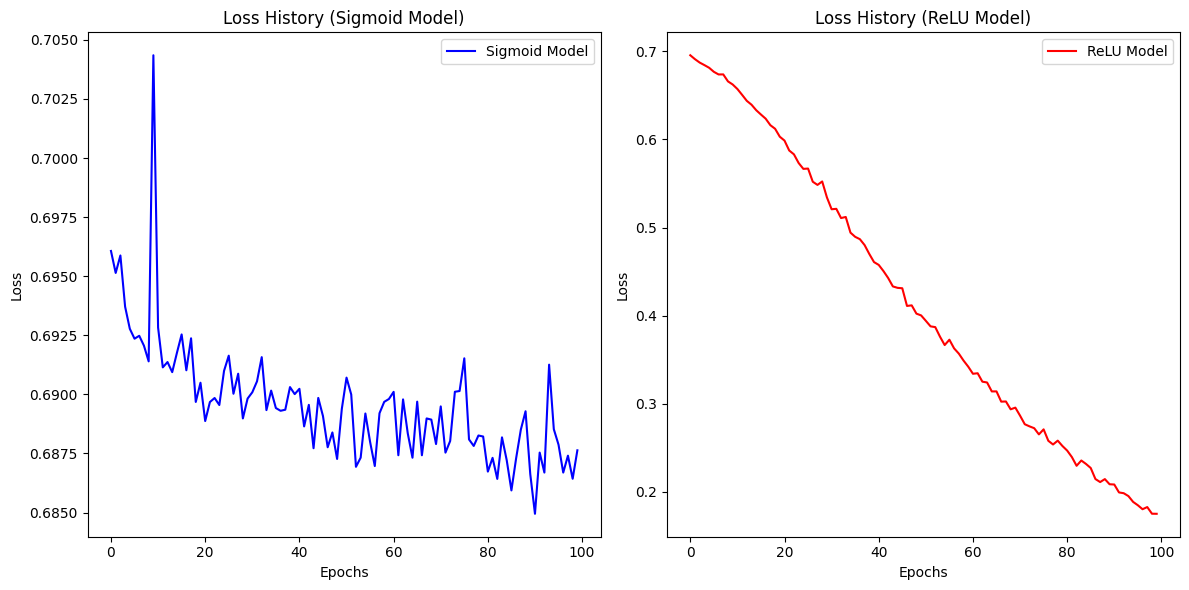

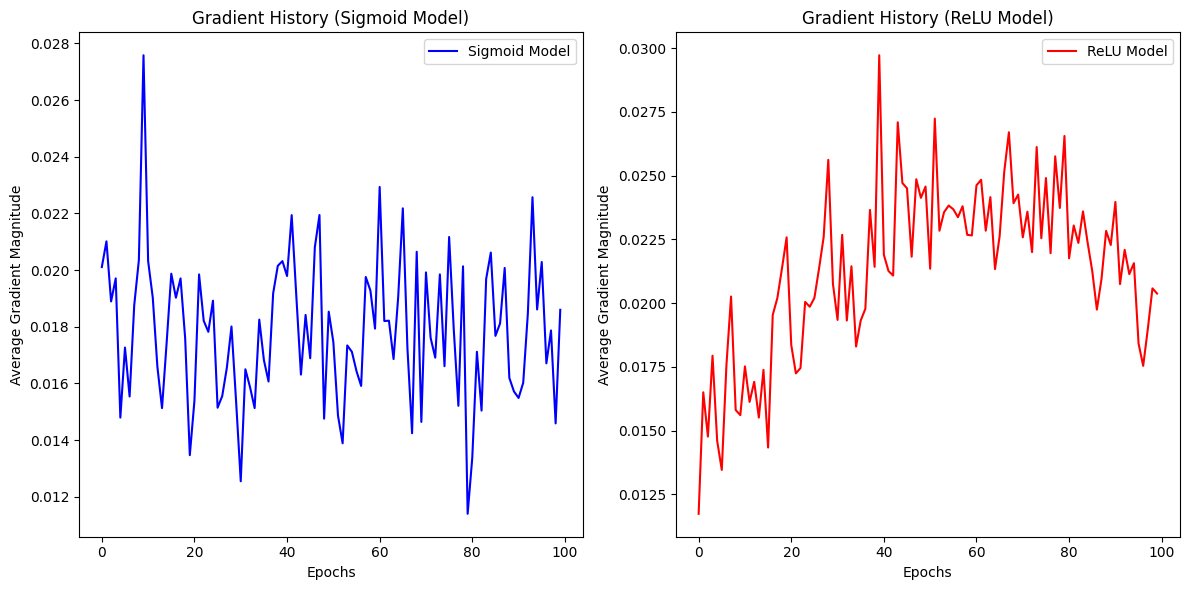

In [ ]:
# Plot the loss history and grad history for  both methods
# Plot the loss history for both models
plt.figure(figsize=(12, 6))

# Plot for the Sigmoid model
plt.subplot(1, 2, 1)
plt.plot(sigmoid_loss_history, label='Sigmoid Model', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss History (Sigmoid Model)')
plt.legend()

# Plot for the ReLU model
plt.subplot(1, 2, 2)
plt.plot(relu_loss_history, label='ReLU Model', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss History (ReLU Model)')
plt.legend()

plt.tight_layout()
plt.show()

# Plot the gradient history for both models
plt.figure(figsize=(12, 6))

# Plot for the Sigmoid model
plt.subplot(1, 2, 1)
plt.plot(sigmoid_grad_history, label='Sigmoid Model', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Average Gradient Magnitude')
plt.title('Gradient History (Sigmoid Model)')
plt.legend()

# Plot for the ReLU model
plt.subplot(1, 2, 2)
plt.plot(relu_grad_history, label='ReLU Model', color='red')
plt.xlabel('Epochs')
plt.ylabel('Average Gradient Magnitude')
plt.title('Gradient History (ReLU Model)')
plt.legend()

plt.tight_layout()
plt.show()


# What do you observe ?

ReLU provides faster training and more stable gradients due to its ability to avoid the vanishing gradient problem. However, it can suffer from the dying ReLU problem, where neurons may stop learning if their inputs are always negative.

Sigmoid is more prone to issues such as vanishing gradients, which can significantly slow down training and make it less efficient, especially when the network is deep.

